## 1. imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 2. data preprocessing

In [3]:
df = pd.read_csv('breast_cancer_dataset.csv')
df = df.drop(columns=['ID'])
print(df.head())
# 1: mean
# 2: standard error
# 3: worst

  Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0         M    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1         M    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2         M    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3         M    11.42     20.38       77.58   386.1      0.14250       0.28390   
4         M    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  ...  radius3  texture3  perimeter3  \
0      0.3001          0.14710     0.2419  ...    25.38     17.33      184.60   
1      0.0869          0.07017     0.1812  ...    24.99     23.41      158.80   
2      0.1974          0.12790     0.2069  ...    23.57     25.53      152.50   
3      0.2414          0.10520     0.2597  ...    14.91     26.50       98.87   
4      0.1980          0.10430     0.1809  ...    22.54     16.67      152.20   

    area3  smoothness3  co

In [4]:
# number of each class
print(df['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64


In [5]:
# train test split
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis'].replace({'M': 1, 'B': 0})

/var/folders/z2/_0c1fw_d62gfdmm0hfw2lfpr0000gn/T/ipykernel_8885/1901172651.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Diagnosis'].replace({'M': 1, 'B': 0})


### 2.1  0.7/0.3 split

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### 2.2 using only mean data

In [10]:
# get all columns that have 1 in column name
mean_df_x = df.filter(like='1')
mean_df_y = df['Diagnosis'].replace({'M': 1, 'B': 0})
# train test split
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(mean_df_x, mean_df_y, test_size=0.3, random_state=42)

/var/folders/z2/_0c1fw_d62gfdmm0hfw2lfpr0000gn/T/ipykernel_8885/3440945245.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_df_y = df['Diagnosis'].replace({'M': 1, 'B': 0})


## 3. Models

### 3.1 Logistic Regression

In [6]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))


Accuracy:  0.9707602339181286
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion Matrix: 
 [[107   1]
 [  4  59]]
ROC AUC Score:  0.9636243386243386


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# grid search for hyperparameter tuning
# grid search for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}
lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Logistic Regression parameters: ", grid_search_lr.best_params_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best Logistic Regression parameters:  {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [8]:
lr = LogisticRegression(max_iter=1000, C=100, penalty='l1', solver='liblinear')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))


Accuracy:  0.9649122807017544
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Confusion Matrix: 
 [[104   4]
 [  2  61]]
ROC AUC Score:  0.9656084656084657


In [ ]:
# fit and predict with only mean columns
lr = LogisticRegression(max_iter=1000, C=100, penalty='l1', solver='liblinear')

lr.fit(X_train_mean, y_train_mean)
y_pred_mean = lr.predict(X_test_mean)

print("Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

Accuracy:  0.9473684210526315
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       108
           1       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix: 
 [[104   4]
 [  5  58]]
ROC AUC Score:  0.9417989417989417


### 3.2 Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report: \n", classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Random Forest ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Random Forest Accuracy:  0.9590643274853801
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Random Forest Confusion Matrix: 
 [[107   1]
 [  6  57]]
Random Forest ROC AUC Score:  0.9477513227513227


In [10]:
# grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest parameters: ", grid_search_rf.best_params_)

Best Random Forest parameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

In [11]:
rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report: \n", classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Random Forest ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Random Forest Accuracy:  0.9590643274853801
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Random Forest Confusion Matrix: 
 [[106   2]
 [  5  58]]
Random Forest ROC AUC Score:  0.9510582010582009


In [ ]:
# fit and predict with only mean columns
rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='sqrt')
rf.fit(X_train_mean, y_train_mean)
y_pred_mean = rf.predict(X_test_mean)
print("Random Forest Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("Random Forest Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("Random Forest ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

Random Forest Accuracy:  0.9415204678362573
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Random Forest Confusion Matrix: 
 [[103   5]
 [  5  58]]
Random Forest ROC AUC Score:  0.9371693121693121


### 3.3 Decision Tree

In [12]:
# before fine tuning
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report: \n", classification_report(y_test, y_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Decision Tree ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Decision Tree Accuracy:  0.9064327485380117
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       108
           1       0.83      0.94      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171

Decision Tree Confusion Matrix: 
 [[96 12]
 [ 4 59]]
Decision Tree ROC AUC Score:  0.9126984126984127


In [13]:
# grid search for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree parameters: ", grid_search_dt.best_params_)

Best Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [14]:
dt = DecisionTreeClassifier(random_state=42, min_samples_split=5, min_samples_leaf=4, max_features='log2', criterion='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report: \n", classification_report(y_test, y_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Decision Tree ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Decision Tree Accuracy:  0.9473684210526315
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Decision Tree Confusion Matrix: 
 [[105   3]
 [  6  57]]
Decision Tree ROC AUC Score:  0.9384920634920634


In [ ]:
# fit and predict with only mean columns
dt = DecisionTreeClassifier(random_state=42, min_samples_split=5, min_samples_leaf=4, max_features='log2', criterion='gini')
dt.fit(X_train_mean, y_train_mean)
y_pred_mean = dt.predict(X_test_mean)
print("Decision Tree Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("Decision Tree Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("Decision Tree ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

Decision Tree Accuracy:  0.9532163742690059
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Decision Tree Confusion Matrix: 
 [[106   2]
 [  6  57]]
Decision Tree ROC AUC Score:  0.943121693121693


### 3.4 GradientBoost

In [15]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred))
print("Gradient Boosting Classification Report: \n", classification_report(y_test, y_pred))
print("Gradient Boosting Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Gradient Boosting ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Gradient Boosting Accuracy:  0.9532163742690059
Gradient Boosting Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Gradient Boosting Confusion Matrix: 
 [[106   2]
 [  6  57]]
Gradient Boosting ROC AUC Score:  0.943121693121693


In [16]:
# grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print("Best Gradient Boosting parameters: ", grid_search_gb.best_params_)

Best Gradient Boosting parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [17]:
gb = GradientBoostingClassifier(n_estimators=200, random_state=42, learning_rate=0.2, max_depth=5, min_samples_split=10, min_samples_leaf=4)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, y_pred))
print("Gradient Boosting Classification Report: \n", classification_report(y_test, y_pred))
print("Gradient Boosting Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Gradient Boosting ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Gradient Boosting Accuracy:  0.9532163742690059
Gradient Boosting Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Gradient Boosting Confusion Matrix: 
 [[105   3]
 [  5  58]]
Gradient Boosting ROC AUC Score:  0.9464285714285714


In [ ]:
# fit and predict with only mean columns
gb = GradientBoostingClassifier(n_estimators=200, random_state=42, learning_rate=0.2, max_depth=5, min_samples_split=10, min_samples_leaf=4)
gb.fit(X_train_mean, y_train_mean)
y_pred_mean = gb.predict(X_test_mean)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("Gradient Boosting Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("Gradient Boosting Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("Gradient Boosting ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

Gradient Boosting Accuracy:  0.9473684210526315
Gradient Boosting Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Gradient Boosting Confusion Matrix: 
 [[102   6]
 [  3  60]]
Gradient Boosting ROC AUC Score:  0.9484126984126984


### 3.5 SVM

In [ ]:
# grid search for hyperparameter tuning
# took over 16 hours to run
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}
svc = SVC()
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)
best_svc = grid_search_svc.best_estimator_
print("Best SVC parameters: ", grid_search_svc.best_params_)

In [18]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("SVC Accuracy: ", accuracy_score(y_test, y_pred))
print("SVC Classification Report: \n", classification_report(y_test, y_pred))
print("SVC Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("SVC ROC AUC Score: ", roc_auc_score(y_test, y_pred))

SVC Accuracy:  0.9707602339181286
SVC Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

SVC Confusion Matrix: 
 [[105   3]
 [  2  61]]
SVC ROC AUC Score:  0.9702380952380952


In [ ]:
# fit and predict with only mean columns
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_mean, y_train_mean)
y_pred_mean = svc.predict(X_test_mean)
print("SVC Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("SVC Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("SVC Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("SVC ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

SVC Accuracy:  0.9590643274853801
SVC Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

SVC Confusion Matrix: 
 [[105   3]
 [  4  59]]
SVC ROC AUC Score:  0.9543650793650793


## 4. PCA

In [23]:
# Apply PCA
pca = PCA(n_components=10)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print explained variance ratio
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

Explained Variance Ratio:  [9.80134513e-01 1.75847763e-02 2.07235397e-03 1.20206711e-04
 7.74041445e-05 5.70499529e-06 3.66974239e-06 8.00876266e-07
 3.37279690e-07 1.53794910e-07]


In [17]:
# Apply PCA
pca_mean = PCA(n_components=8)  # Adjust n_components as needed
X_train_pca_mean = pca_mean.fit_transform(X_train_mean)
X_test_pca_mean = pca_mean.transform(X_test_mean)

# Print explained variance ratio
print("Explained Variance Ratio: ", pca_mean.explained_variance_ratio_)

Explained Variance Ratio:  [9.99746640e-01 1.40967707e-04 1.11964561e-04 4.12703669e-07
 8.73485842e-09 3.75160918e-09 1.78718026e-09 8.66861442e-10]


### 4.1 PCA on Logistic Regression

LR Accuracy:  0.9707602339181286
LR Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

LR Confusion Matrix: 
 [[106   2]
 [  3  60]]
LR ROC AUC Score:  0.966931216931217


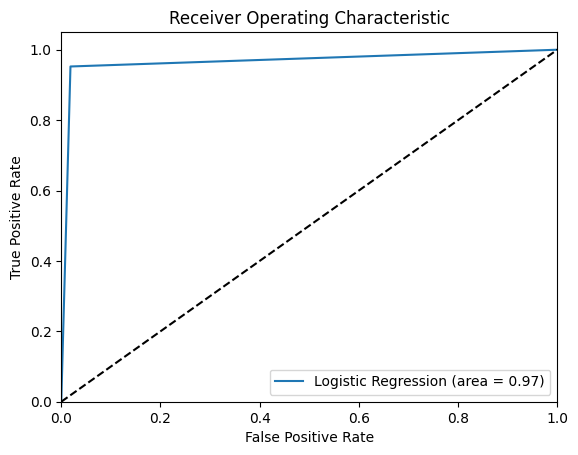

In [ ]:
# Update models to use PCA-transformed data
lr = LogisticRegression(max_iter=1000, C=100, penalty='l1', solver='liblinear')
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

print("LR Accuracy: ", accuracy_score(y_test, y_pred))
print("LR Classification Report: \n", classification_report(y_test, y_pred))
print("LR Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("LR ROC AUC Score: ", roc_auc_score(y_test, y_pred))
# plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# fit and predict with only mean columns
lr = LogisticRegression(max_iter=1000, C=100, penalty='l1', solver='liblinear')
lr.fit(X_train_pca_mean, y_train_mean)
y_pred_mean = lr.predict(X_test_pca_mean)

print("LR Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("LR Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("LR Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("LR ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

LR Accuracy:  0.9415204678362573
LR Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

LR Confusion Matrix: 
 [[103   5]
 [  5  58]]
LR ROC AUC Score:  0.9371693121693121


### 4.2 PCA on Gradient Boosting

In [26]:
gb = GradientBoostingClassifier(n_estimators=200, random_state=42, learning_rate=0.2, max_depth=5, min_samples_split=10, min_samples_leaf=4)
gb.fit(X_train_pca, y_train)
y_pred = gb.predict(X_test_pca)
print("GB Accuracy: ", accuracy_score(y_test, y_pred))
print("GB Classification Report: \n", classification_report(y_test, y_pred))
print("GB Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("GB ROC AUC Score: ", roc_auc_score(y_test, y_pred))

GB Accuracy:  0.9532163742690059
GB Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

GB Confusion Matrix: 
 [[105   3]
 [  5  58]]
GB ROC AUC Score:  0.9464285714285714


In [ ]:
# fit and predict with only mean columns
gb = GradientBoostingClassifier(n_estimators=200, random_state=42, learning_rate=0.2, max_depth=5, min_samples_split=10, min_samples_leaf=4)
gb.fit(X_train_pca_mean, y_train_mean)
y_pred_mean = gb.predict(X_test_pca_mean)
print("GB Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("GB Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("GB Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("GB ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

GB Accuracy:  0.9415204678362573
GB Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       108
           1       0.87      0.98      0.93        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

GB Confusion Matrix: 
 [[99  9]
 [ 1 62]]
GB ROC AUC Score:  0.9503968253968255


### 4.3 PCA on SVM

In [28]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_pca, y_train)
y_pred = svc.predict(X_test_pca)
print("SVC Accuracy: ", accuracy_score(y_test, y_pred))
print("SVC Classification Report: \n", classification_report(y_test, y_pred))
print("SVC Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("SVC ROC AUC Score: ", roc_auc_score(y_test, y_pred))

SVC Accuracy:  0.9766081871345029
SVC Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

SVC Confusion Matrix: 
 [[107   1]
 [  3  60]]
SVC ROC AUC Score:  0.9715608465608465


In [ ]:
# fit and predict with only mean columns
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_pca_mean, y_train_mean)
y_pred_mean = svc.predict(X_test_pca_mean)
print("SVC Accuracy: ", accuracy_score(y_test_mean, y_pred_mean))
print("SVC Classification Report: \n", classification_report(y_test_mean, y_pred_mean))
print("SVC Confusion Matrix: \n", confusion_matrix(y_test_mean, y_pred_mean))
print("SVC ROC AUC Score: ", roc_auc_score(y_test_mean, y_pred_mean))

SVC Accuracy:  0.9473684210526315
SVC Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

SVC Confusion Matrix: 
 [[105   3]
 [  6  57]]
SVC ROC AUC Score:  0.9384920634920634


## 5. Evaluation

### 5.1 PCA ROC Curve

In [ ]:
# Plot ROC curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

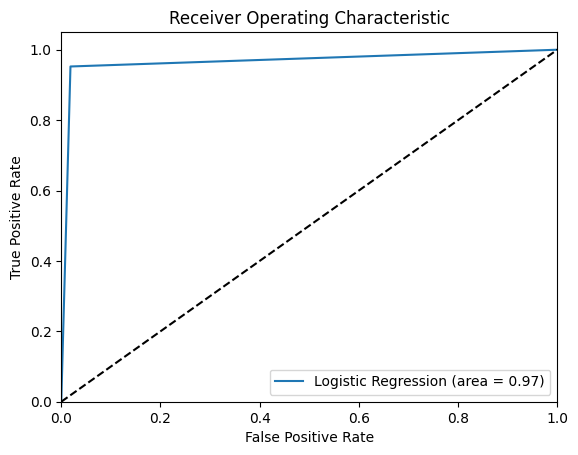

In [25]:
# Logistic Regression
plot_roc_curve(y_test, y_pred, 'Logistic Regression')

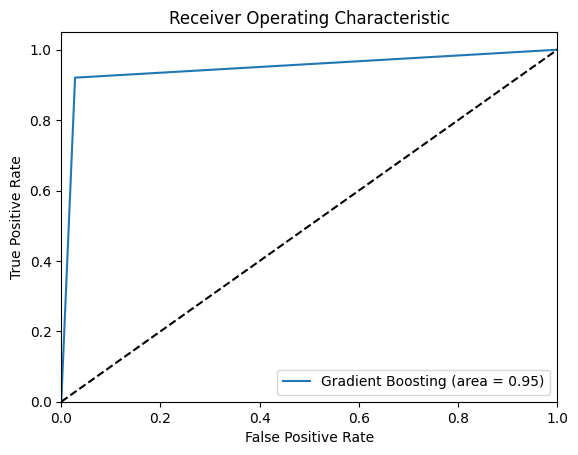

In [27]:
# Gradient Boosting
plot_roc_curve(y_test, y_pred, 'Gradient Boosting')

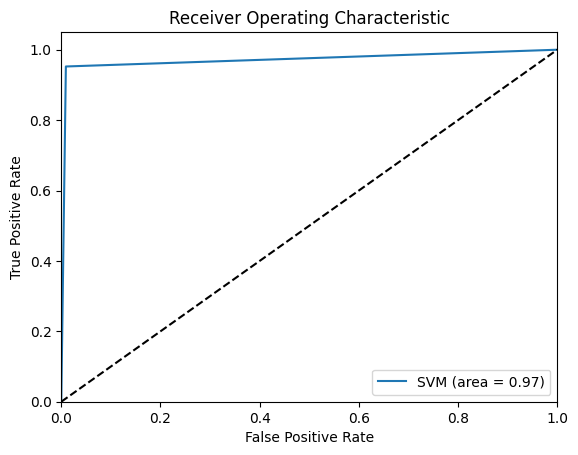

In [29]:
# SVM
plot_roc_curve(y_test, y_pred, 'SVM')